Import libraries and creating the data frame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np


In [2]:
df_phone = pd.read_csv('data/Phone_Project.csv', index_col = None, header=0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(df_phone)

                   Company        City State Country           Phone Location  \
0                     1859   San Diego    CA      US   858) 648-2470      CSS   
1             10X Genomics  Pleasanton    CA      US    925 401 7300      CNA   
2                   10xBio    La Jolla    CA      US             NaN      CSS   
3           13therapeutics    Portland    OR      US    503-784-1400       NW   
4              149 Medical   Worcester    MA      US             NaN       EN   
...                    ...         ...   ...     ...             ...      ...   
6463         Zynex Medical   Englewood    CO      US  (800) 495-6670       UC   
6464          Zyno Medical      Natick    MA      US    508-650-2008       EN   
6465  ZyVersa Therapeutics      Weston    FL      US    754-231-1688        S   
6466                 Zywie        Reno    NV      US    609-924-2575       SW   
6467            ZZ Biotech     Houston    TX      US  (619) 574 0820       SW   

     Region                

Dropping unnecessary columns.

In [3]:
df_phone_and_year = df_phone.drop(df_phone.columns[[0, 1, 2, 3, 5, 6, 7]], axis = 1)
print(df_phone_and_year)

               Phone  Year Founded  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0      858) 648-2470          2019         NaN          NaN          NaN   
1       925 401 7300          2012         NaN          NaN          NaN   
2                NaN          2015         NaN          NaN          NaN   
3       503-784-1400          2008         NaN          NaN          NaN   
4                NaN          2017         NaN          NaN          NaN   
...              ...           ...         ...          ...          ...   
6463  (800) 495-6670          1996         NaN          NaN          NaN   
6464    508-650-2008          2006         NaN          NaN          NaN   
6465    754-231-1688          2014         NaN          NaN          NaN   
6466    609-924-2575          2014         NaN          NaN          NaN   
6467  (619) 574 0820          2006         NaN          NaN          NaN   

      Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0             

Eliminating unnamed columns issue.

In [4]:
df_phone_and_year.columns.str.match("Unnamed")
df_phone_and_year = df_phone_and_year.loc[:,~df_phone_and_year.columns.str.match("Unnamed")]
print(df_phone_and_year)

               Phone  Year Founded
0      858) 648-2470          2019
1       925 401 7300          2012
2                NaN          2015
3       503-784-1400          2008
4                NaN          2017
...              ...           ...
6463  (800) 495-6670          1996
6464    508-650-2008          2006
6465    754-231-1688          2014
6466    609-924-2575          2014
6467  (619) 574 0820          2006

[6468 rows x 2 columns]


filling nan with 0 representing no phone number listed

In [5]:
df_phone_and_year = df_phone_and_year.fillna(0) 
print(df_phone_and_year)


               Phone  Year Founded
0      858) 648-2470          2019
1       925 401 7300          2012
2                  0          2015
3       503-784-1400          2008
4                  0          2017
...              ...           ...
6463  (800) 495-6670          1996
6464    508-650-2008          2006
6465    754-231-1688          2014
6466    609-924-2575          2014
6467  (619) 574 0820          2006

[6468 rows x 2 columns]


Replacing values of phone numbers with the value 1

In [6]:
df_phone_and_year.loc[df_phone_and_year['Phone'] != 0, 'Phone'] = 1
print(df_phone_and_year)

     Phone  Year Founded
0        1          2019
1        1          2012
2        0          2015
3        1          2008
4        0          2017
...    ...           ...
6463     1          1996
6464     1          2006
6465     1          2014
6466     1          2014
6467     1          2006

[6468 rows x 2 columns]


Creating a pivot table to find the percentage of companies with a phone number listed by year founded (The default aggregate operation for the pivot_table function is the mean. Since telephone listed = 1 and not listed = 0, using the pivot_table function will give us a percentage of companies with a phone number listed by year of founding.) 

In [7]:
df_average = df_phone_and_year.pivot_table('Phone', index='Year Founded')
print(df_average)

                 Phone
Year Founded          
1849          1.000000
1853          1.000000
1854          1.000000
1876          1.000000
1886          1.000000
1887          0.666667
1888          1.000000
1889          1.000000
1894          1.000000
1897          1.000000
1901          1.000000
1904          1.000000
1905          1.000000
1908          1.000000
1910          1.000000
1911          1.000000
1915          1.000000
1919          1.000000
1921          1.000000
1923          1.000000
1927          1.000000
1929          1.000000
1931          1.000000
1932          1.000000
1933          1.000000
1935          1.000000
1936          1.000000
1937          1.000000
1938          1.000000
1940          1.000000
1941          1.000000
1942          1.000000
1943          1.000000
1946          1.000000
1947          1.000000
1948          1.000000
1949          1.000000
1950          1.000000
1951          1.000000
1952          1.000000
1953          1.000000
1954       

Creating the line plot of the pivot table.

(1960.0, 2023.0)

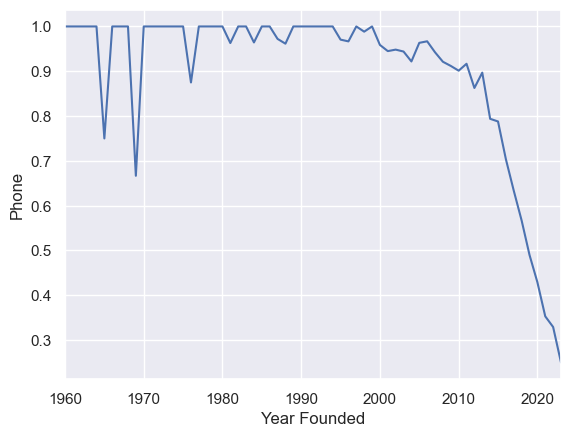

In [9]:
sns.set_theme(style='darkgrid')
fig, line = plt.subplots()
line = sns.lineplot(x = 'Year Founded', y ='Phone', data=df_average)
line.set_xlim(left=1960, right=2023)


Creating the Cyberpunk Format for the line plot showing the percentage of companies with a phone number listed on their website by year founded.

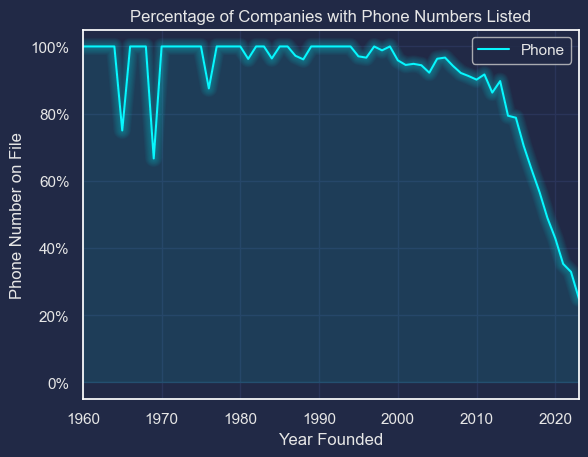

In [10]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

colors = [
    '#08F7FE',  # teal/cyan
]




fig, ax = plt.subplots()

df_average.plot(color=colors, ax=ax)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades

for n in range(1, n_shades+1):

    df_average.plot(
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)

# Color the areas below the lines:
for column, color in zip(df_average, colors):
    ax.fill_between(x=df_average.index,
                    y1=df_average[column].values,
                    y2=[0] * len(df_average),
                    color=color,
                    alpha=0.1)

ax.grid(color='#2A3459')

# Set X Limit, Create Title, Change the Y axis label, Format Y axis to %
ax.set_xlim(left=1960, right=2023)
ax.set_title("Percentage of Companies with Phone Numbers Listed")
ax.set_ylabel('Phone Number on File')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()